## Udacity Ab testing course

### Example of hypothesis test

Udacity
nCont=10072
xCont=974

nExp = 9886
xExp =1242
conf 95%
dThresh = 0.02

In [1]:
pC = 974/10072
pC



0.09670373312152503

In [4]:
#pC = 974/10072
pE= 1242/9886
print(f'P exp is {pE}')
pPool=(974+1242)/(10072+9886)
print(f'P pooled is {pPool}') 


P exp is 0.12563220716164272
P pooled is 0.11103316965627819


In [5]:
sePool=(pPool*(1-pPool)*((1/10072)+(1/9886)))**0.5
sePool
print(f'Std error pooled is {sePool}') 

dMin =pE-pC
dMin

Std error pooled is 0.004447945883692886


0.028928474040117697

In [6]:
#z at 95 1.96
m=1.96*sePool
m

0.008717973932038056

### CI

CI on dMin

In [7]:
print(f'Lower CI is {dMin-m}')
print(f'upper CI is {dMin+m}')


Lower CI is 0.020210500108079642
upper CI is 0.03764644797215575


We can conclude that we have a significant change since the change is greater than lower CI and also is higher than dThresh


The CI is for dMin, how much dMin can vary, based on the pooled SE, So dMin will always be greater than the Min threshold Set even if it goes to lower CI threshold

Our change was greater than lower CI 0.0202, or 2%

At 99 % the z will increase to 2.58

In [8]:
m99=2.58*sePool
m99

0.011475700379927647

In [9]:
dMin-m99

0.01745277366019005

At 99% we can not reject the null hypothesis 
since here we can say that although change is atleast 1.7%
but is not greater than our significance level

DCamp Stat Simulation

### ECDF

In [16]:
! pip3 install matplotlib

     |████████████████████████████████| 8.5 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 1.6 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 61 kB 195 kB/s eta 0:00:01


In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""


    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1)/n

    return x, y

In [18]:
rainfall=np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

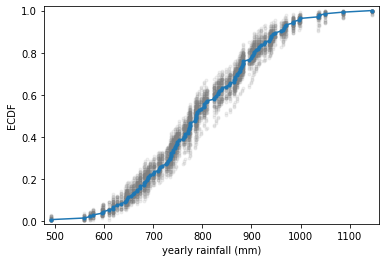

In [19]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf( bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Bootstrap 
we go from data to get 95% CI, 95% of bootstrap results will lie in some range, that range is CI of the data

In [21]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""    
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

10.510549150506188
10.491620930606611


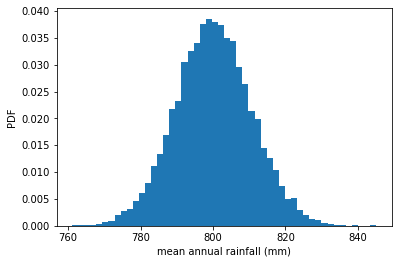

In [37]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print Std Error of Mean
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates, 
###should be same as SEM
bs_std =  np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, 50,density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [26]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([779.83953008, 821.35      ])

In [28]:
m=1.96*sem
m

20.60067633499213

In [34]:
np.mean(rainfall) -m

779.4910529883161

In [33]:
np.mean(rainfall) +m

820.6924056583005

Variance is not normally distributed

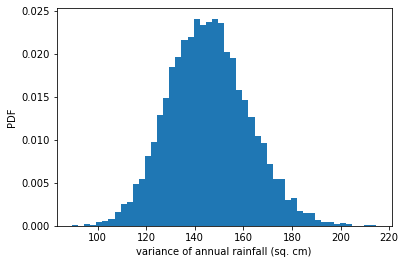

In [39]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, 50,density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

The plot has a larger tail so not normal, we can get CI using bootstrap in this case


### pairs BS for Lin Reg

In [40]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


In [41]:
illiteracy =np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])


fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

[0.044649   0.05523932]


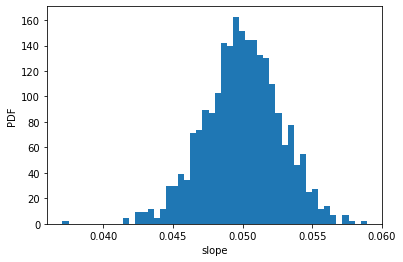

In [43]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

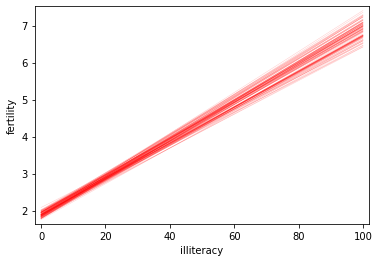

In [44]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot()

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

### Permutation samples, to check similarity of 2 distributions




In [46]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [48]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

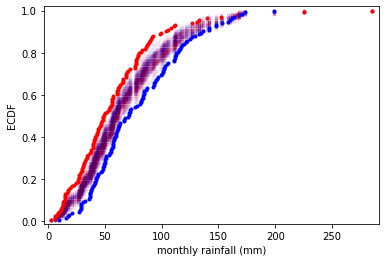

In [49]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

None of the permuted sample overlaps, so dists arent identically distributed

p value

the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

In [50]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [51]:
force_a= np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])
force_b=np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [55]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a,force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>=empirical_diff_means  ) / len(perm_replicates )

# Print the result
print('p-value =', p)

p-value = 0.0051


The p-value tells you that there is about a 0.5% 
chance that you would get the difference of means observed in the experiment if frogs were exactly the same.

In [56]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b)+ 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0038


In [57]:

nCont=500
xCont=45

nExp = 500
xExp=67



In [58]:


pC = xCont/nCont
pE= xExp/nExp

print(f'P Cont is {pC}')
print(f'P exp is {pE}')
pPool=(xCont+xExp)/(nCont+nExp)
print(f'P pooled is {pPool}') 



P Cont is 0.09
P exp is 0.134
P pooled is 0.112


In [59]:
sePool=(pPool*(1-pPool)*((1/nCont)+(1/nExp)))**0.5
sePool
print(f'Std error pooled is {sePool}') 

dMin =pE-pC
dMin

Std error pooled is 0.0199455258140767


0.04400000000000001

In [60]:
m=1.96*sePool

In [61]:
print(f'Lower CI is {dMin-m}')
print(f'upper CI is {dMin+m}')



Lower CI is 0.004906769404409678
upper CI is 0.08309323059559034


The CI is for change, how much change is permissible

### doing same by permutation test

In [63]:


controls = np.array([True] * xCont + [False] * (nCont-xCont))
exposed = np.array([True] * xExp + [False] * (nExp-xExp))

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)        
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

diff_frac_obs = diff_frac(controls,exposed)

perm_replicates = np.empty(10000)
for i in range(10000):     
    perm_replicates[i] = draw_perm_reps(                
        controls, exposed, diff_frac)
    
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
p_value



0.0177

#### Hypothesis test on R square

Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.

In [65]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]



# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy,fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted,fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)

print('p-val =', p)

p-val = 0.0


Statistical Simulations

In [68]:
lam =10
sampD = np.random.poisson(lam, 100000)
##Distrib
abs(np.mean(sampD)-lam) 

0.00015362299999921447

In [69]:
del(sampD)

In [71]:
deck_of_cards=[('Heart', 0),
 ('Heart', 1),
 ('Heart', 2),
 ('Heart', 3),
 ('Heart', 4),
 ('Heart', 5),
 ('Heart', 6),
 ('Heart', 7),
 ('Heart', 8),
 ('Heart', 9),
 ('Heart', 10),
 ('Heart', 11),
 ('Heart', 12),
 ('Club', 0),
 ('Club', 1),
 ('Club', 2),
 ('Club', 3),
 ('Club', 4),
 ('Club', 5),
 ('Club', 6),
 ('Club', 7),
 ('Club', 8),
 ('Club', 9),
 ('Club', 10),
 ('Club', 11),
 ('Club', 12),
 ('Spade', 0),
 ('Spade', 1),
 ('Spade', 2),
 ('Spade', 3),
 ('Spade', 4),
 ('Spade', 5),
 ('Spade', 6),
 ('Spade', 7),
 ('Spade', 8),
 ('Spade', 9),
 ('Spade', 10),
 ('Spade', 11),
 ('Spade', 12),
 ('Diamond', 0),
 ('Diamond', 1),
 ('Diamond', 2),
 ('Diamond', 3),
 ('Diamond', 4),
 ('Diamond', 5),
 ('Diamond', 6),
 ('Diamond', 7),
 ('Diamond', 8),
 ('Diamond', 9),
 ('Diamond', 10),
 ('Diamond', 11),
 ('Diamond', 12)]

In [72]:
np.random.shuffle(deck_of_cards)

In [73]:
deck_of_cards[:5]

[('Spade', 11), ('Club', 5), ('Diamond', 6), ('Spade', 5), ('Club', 11)]

In [75]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6]*6, 2
sims, wins = 100000, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=num_dice, p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0]==outcomes[1]: 
        wins = wins + 1 

print("In {} games, you win {} times".format(sims, wins))


In 100000 games, you win 16667 times


In [86]:
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 100000000
payoffs = [-lottery_ticket_cost,grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning,chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)


answer = np.sum(outcomes)
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 100000000 simulations = -20000


In [85]:
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    print(outcomes.mean())             
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

array([-10, -10, -10, ..., -10, -10, -10])

### Metrics- Lesson 3

Sanity checks
Evaluation

1 sentence summary of a metric
e. g Click through rate

2nd stage
Who is an active user

composite metric, OEC- overall evaluation critireon eg wtd combined metric, not used much

Rates are better for the usability


External data
a better way to do the validation is to look at a time series of both your
internally computed metric and the externally available one, and see if the trends and seasonal variability
line up.